<h1 style="color:green">Health Failure Prediction </h1>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [2]:
data = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<h3 style="color :red"> Columns Meaning : </h3>
- Age : Age of patient <br></br>
- Anemina : 1 if True , 0 if False <br></br>
- Diabetes : 1 if True , 0 if False <br></br>
- High blood pressure : 1 if True , 0 if False <br></br>
- Sex : 1 Male , 0 Female <br></br>
- Smoking : 1 if True , 0 if False  <br></br>
- Other features are numerical features .


In [3]:
# data shape
print('Data Shape is : ', data.shape)

Data Shape is :  (299, 13)


In [4]:
#check null values
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

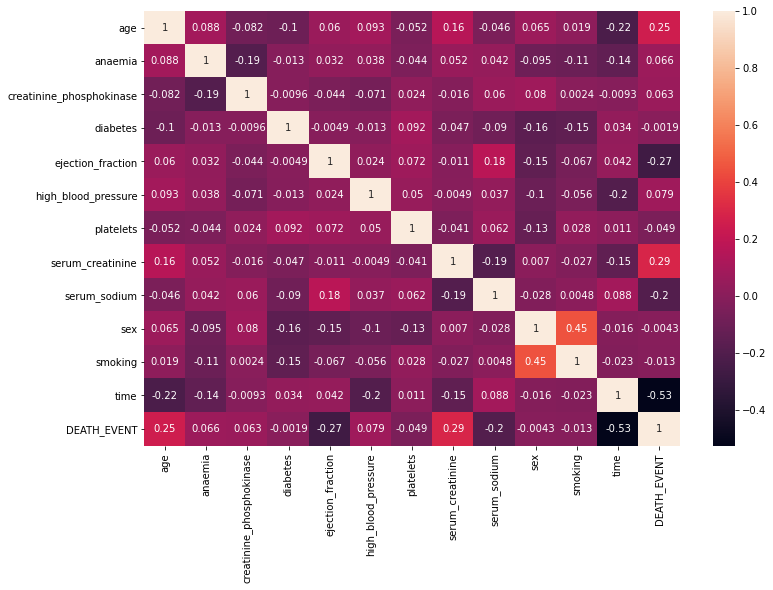

In [5]:
# Features correlation
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot = True)

- Age , Ejection_fraction , Serum_creatine and time are highly correlated with the target than other features .

We should divide our data to two categories : 
- Numerical Values 
- Categorical Values

In [6]:
def Get_Features_types(data):
    categorical_features = []
    numerical_features = []
    for col in data.iloc[:,:-1]:
        if data[col].nunique() < 10:
            categorical_features.append(col)
        else : 
            numerical_features.append(col)
    return categorical_features , numerical_features

Get_Features_types(data)

categorical_features = Get_Features_types(data)[0]
numerical_features = Get_Features_types(data)[1]

print(categorical_features)
print(numerical_features)

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


<h1 style="color:red">Categorical Values</h1>

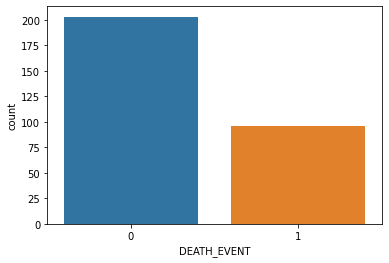

In [7]:
sns.countplot( x = 'DEATH_EVENT' , data = data)

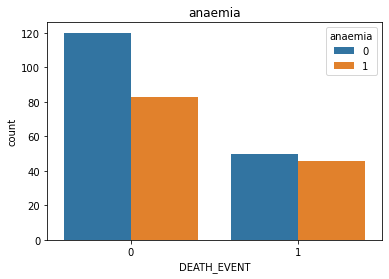

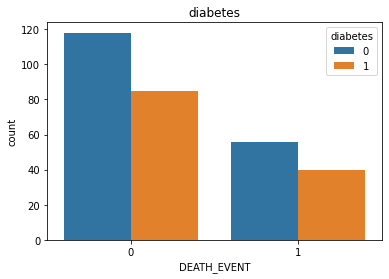

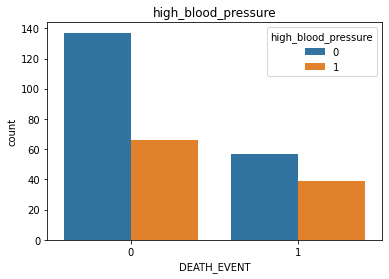

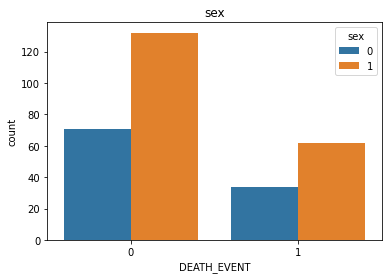

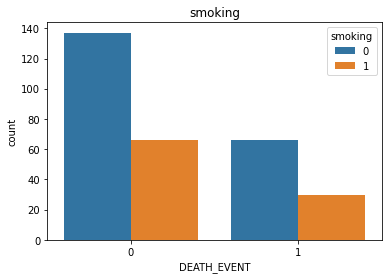

In [8]:
def CountPlot_hue_Categorical_data(data):
    for feature in categorical_features:
        plt.figure()
        sns.countplot(x = "DEATH_EVENT" , data = data , hue=feature)
        plt.title(feature)

CountPlot_hue_Categorical_data(data)

In [9]:
def Get_Percentage_data(data):
    percentage_death_true_case = []
    percentage_death_false_case = []
    for col in categorical_features:
        true_case = round(data['DEATH_EVENT'][data[col] == 1].value_counts(normalize = True)[1] * 100 , 2)
        false_case = round(data['DEATH_EVENT'][data[col] == 0].value_counts(normalize = True)[1] * 100,2)
        percentage_death_true_case.append(true_case)
        percentage_death_false_case.append(false_case)
    Percentage = pd.DataFrame(list(zip(percentage_death_true_case , percentage_death_false_case)) ,
                              index = categorical_features ,
                              columns = ['% Percentage Death (IF 1)' , '% Percentage Death (IF 0)'])
    return Percentage
        
Get_Percentage_data(data)

,% Percentage Death (IF 1),% Percentage Death (IF 0)
anaemia,35.66,29.41
diabetes,32.00,32.18
high_blood_pressure,37.14,29.38
sex,31.96,32.38
smoking,31.25,32.51


This data can show : 
-  People who smoke has a percentage of death (31,25 ) , otherwise peole who don't has a percentage of death ( 32,51) [so strange seriously]
- Percentage of Men's death is roughly equivalent to women's death ( Same for poeple who has diabetes).
- In High blood pressure and Amenia  , we can see obviously a little difference between percentage of death ( IF True)


<h1 style="color:red">Numerical Values</h1>

In [10]:
def BOX_Plot_numerical_features(data):
    for col in numerical_features:
        plt.figure()
        sns.boxplot(data[col])

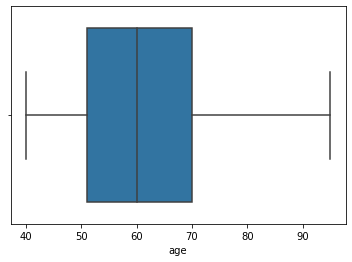

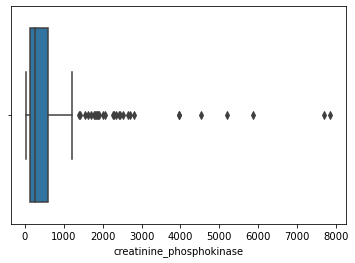

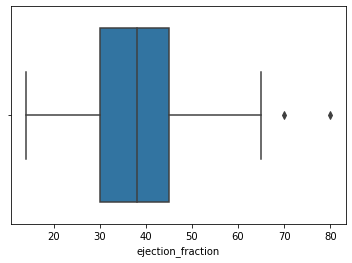

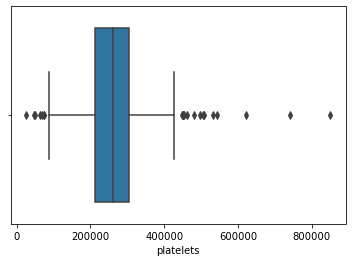

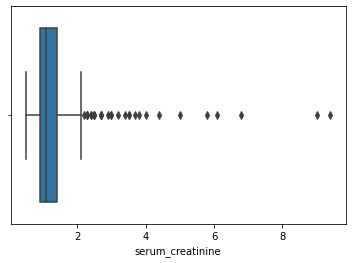

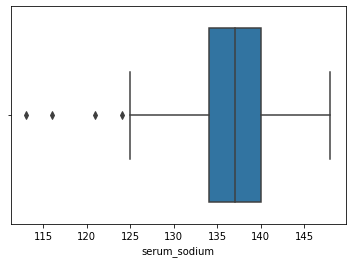

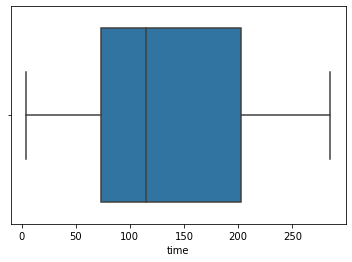

In [11]:
BOX_Plot_numerical_features(data)

In [12]:
print("Numerical Features are " , numerical_features)

Numerical Features are  ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


Drawing box plot can show many details : 
- Detecting outliers in ejection_fraction ( we will drop them ) 
- No outliers in features like : Age and time 
- In Medical fields , values for features : <br></br>
    Creatinine_phosphokinase <br></br> Platelets <br></br> Serum_creatinine <br></br>Serum_sodium <br></br>are possibles in range of values , so we will keep them in order to have a reasonable prediction 


In [13]:
data[data['ejection_fraction'] > 65]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


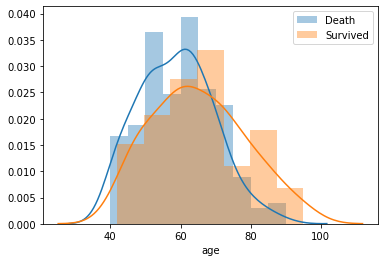

In [14]:
## Age 
sns.distplot(data[data['DEATH_EVENT'] == 0]['age'] , label ="Death")
sns.distplot(data[data['DEATH_EVENT'] == 1]['age'] , label = "Survived")
plt.legend()

We can see here that people with under than 70 have a probability of surviving more than death  .

0    164
1     58
Name: DEATH_EVENT, dtype: int64


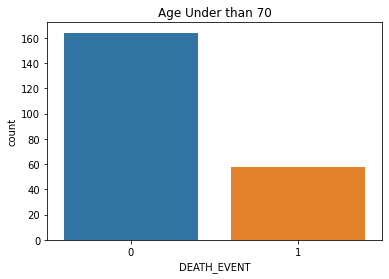

1    31
0    21
Name: DEATH_EVENT, dtype: int64


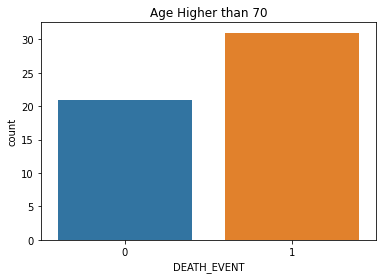

In [15]:
plt.figure()
sns.countplot(data[(data['age'] < 70)]['DEATH_EVENT'])
print(data[(data['age'] < 70)]['DEATH_EVENT'].value_counts())
plt.title("Age Under than 70")
plt.show()
####
plt.figure()
sns.countplot(data[(data['age'] > 70)]['DEATH_EVENT'])
print(data[(data['age'] > 70)]['DEATH_EVENT'].value_counts())
plt.title("Age Higher than 70")
plt.show()

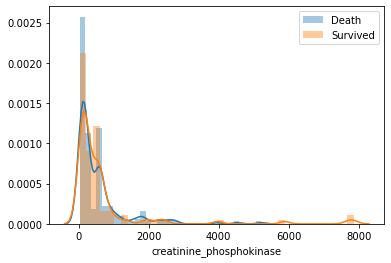

In [16]:
## Creatinine_phosphokinase
sns.distplot(data[data['DEATH_EVENT'] == 0]['creatinine_phosphokinase'] , label ="Death")
sns.distplot(data[data['DEATH_EVENT'] == 1]['creatinine_phosphokinase'] , label = "Survived")
plt.legend()

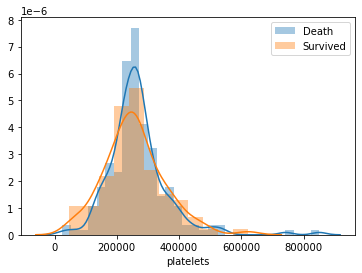

In [17]:
## Platelets
sns.distplot(data[data['DEATH_EVENT'] == 0]['platelets'] , label ="Death")
sns.distplot(data[data['DEATH_EVENT'] == 1]['platelets'] , label = "Survived")
plt.legend()

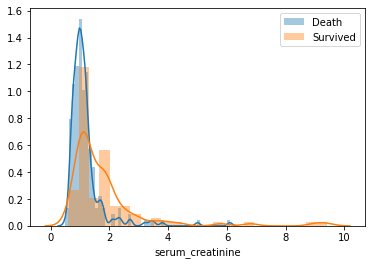

In [18]:
## Serum_creatinine
sns.distplot(data[data['DEATH_EVENT'] == 0]['serum_creatinine'] , label ="Death")
sns.distplot(data[data['DEATH_EVENT'] == 1]['serum_creatinine'] , label = "Survived")
plt.legend()

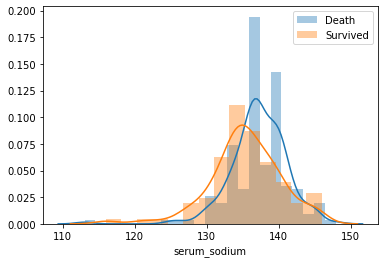

In [19]:
## Serum_sodium
sns.distplot(data[data['DEATH_EVENT'] == 0]['serum_sodium'] , label ="Death")
sns.distplot(data[data['DEATH_EVENT'] == 1]['serum_sodium'] , label = "Survived")
plt.legend()

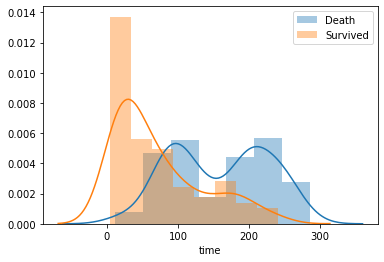

In [20]:
# Time
sns.distplot(data[data['DEATH_EVENT'] == 0]['time'] , label ="Death")
sns.distplot(data[data['DEATH_EVENT'] == 1]['time'] , label = "Survived")
plt.legend()

it's obivious that people more than a follow-up period (days) more than 90 have a probalibity of surviving more than death .


0    158
1     27
Name: DEATH_EVENT, dtype: int64


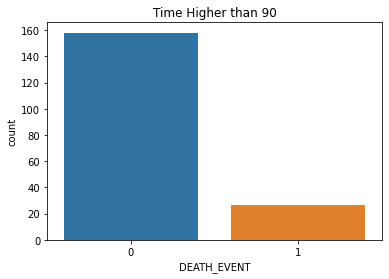

1    67
0    43
Name: DEATH_EVENT, dtype: int64


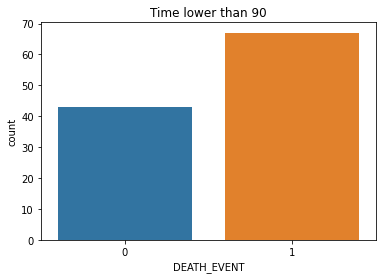

In [21]:
plt.figure()
sns.countplot(data[data['time'] > 90]['DEATH_EVENT'])
print(data[data['time'] > 90]['DEATH_EVENT'].value_counts())
plt.title("Time Higher than 90")
plt.show()
####
plt.figure()
sns.countplot(data[data['time'] < 90]['DEATH_EVENT'])
print(data[data['time'] < 90]['DEATH_EVENT'].value_counts())
plt.title("Time lower than 90")
plt.show()


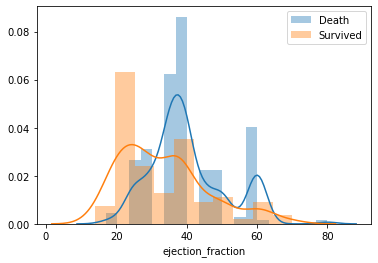

In [22]:
# Ejection_fraction
sns.distplot(data[data['DEATH_EVENT'] == 0]['ejection_fraction'] , label ="Death")
sns.distplot(data[data['DEATH_EVENT'] == 1]['ejection_fraction'] , label = "Survived")
plt.legend()

People with ejection fracrtion more than 30 have a probability of surviving more than death .

0    182
1     58
Name: DEATH_EVENT, dtype: int64


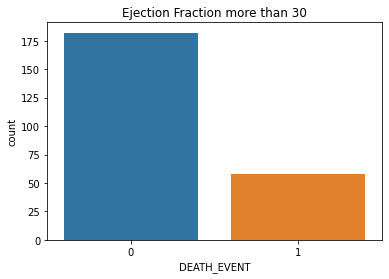

1    38
0    21
Name: DEATH_EVENT, dtype: int64


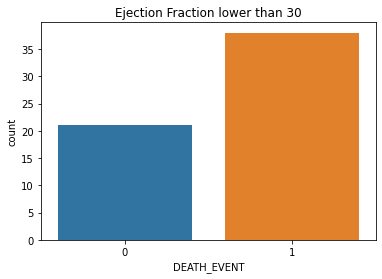

In [23]:
sns.countplot(data[data['ejection_fraction'] > 28]['DEATH_EVENT'])
print(data[data['ejection_fraction'] > 28]['DEATH_EVENT'].value_counts())
plt.title("Ejection Fraction more than 30")
plt.show()
#####
sns.countplot(data[data['ejection_fraction'] < 30]['DEATH_EVENT'])
print(data[data['ejection_fraction'] < 30]['DEATH_EVENT'].value_counts())
plt.title("Ejection Fraction lower than 30")
plt.show()

<h1 style="color:red">Feature Engineering</h1>

- Using domain knowledge to extract features from raw data via data mining techniques is one of the best typical methods to improve our model 

In [24]:
data_copy= data.copy()

In [25]:
data_copy['platelets/age'] = data['platelets'] / data['age']
data_copy['time/age'] = data['time'] / data['age']


In [26]:
data_copy.drop(['platelets' , 'time'] , axis = 1 , inplace = True ) 
data_copy.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT,platelets/age,time/age
0,75.0,0,582,0,20,1,1.9,130,1,0,1,3533.333333,0.053333
1,55.0,0,7861,0,38,0,1.1,136,1,0,1,4788.327818,0.109091
2,65.0,0,146,0,20,0,1.3,129,1,1,1,2492.307692,0.107692
3,50.0,1,111,0,20,0,1.9,137,1,0,1,4200.000000,0.140000
4,65.0,1,160,1,20,0,2.7,116,0,0,1,5030.769231,0.123077


<h1 style="color:red">Modelisation</h1>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier ,AdaBoostClassifier
from sklearn.metrics import f1_score as f1
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest , f_classif

In [28]:
#Split the data
X = data_copy.drop(['DEATH_EVENT'] , axis = 1)
y = data_copy['DEATH_EVENT']
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 ,random_state=1)

In [29]:
# We will use KNN with differents values of k in order to have an idea about our score accuracy and f1-score
def KNN_best_scores(n_iterations):
    acc_score = []
    f1_score = []
    for k in range(1,n_iterations):
        model = KNeighborsClassifier(n_neighbors= k)
        model.fit(x_train , y_train)
        y_pred = model.predict(x_test)
        acc_score.append(model.score(x_test , y_test))
        f1_score.append(f1(y_pred , y_test))
    Knn_scores = pd.DataFrame(list(zip(acc_score , f1_score)) , index = range(1,n_iterations) ,
                              columns = ['Accuracy Score' , 'F1_Score'])
    print('Best values for f1_score are : \n',Knn_scores.nlargest(5, ['F1_Score']))
    return  Knn_scores.nlargest(5, ['Accuracy Score'])

In [30]:
#Selecting a range of value between (1,20)
KNN_best_scores(20)

Best values for f1_score are : 
    Accuracy Score  F1_Score
6        0.800000  0.500000
7        0.783333  0.480000
8        0.800000  0.454545
9        0.766667  0.416667
5        0.716667  0.413793


,Accuracy Score,F1_Score
6,0.800000,0.500000
8,0.800000,0.454545
7,0.783333,0.480000
10,0.783333,0.380952
2,0.766667,0.300000


In [31]:
## RandomForest
def RandomForest_best_score():
    model = RandomForestClassifier()
    model.fit(x_train,y_train)
    acc_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    f1_score = f1(y_pred , y_test)
    return pd.DataFrame([[acc_score , f1_score]] , columns = ['Accuracy Score' , 'F1_Score'])
    

In [32]:
print("RandomForest : Accuracy Score / F1_Score")
RandomForest_best_score()

RandomForest : Accuracy Score / F1_Score


,Accuracy Score,F1_Score
0,0.916667,0.827586


In [33]:
# Gradient Boosting Classifier
def GradientBoosting_best_score():
    model = GradientBoostingClassifier()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    acc_score = model.score(x_test , y_test)
    f1_score = f1(y_pred , y_test)
    
    return pd.DataFrame([[acc_score , f1_score]] , columns = ['Accuracy Score' , 'F1_Score'])

    
    

In [34]:
print("GradientBoosting : Accuracy Score / F1_Score")

GradientBoosting_best_score()

GradientBoosting : Accuracy Score / F1_Score


,Accuracy Score,F1_Score
0,0.866667,0.714286


In [35]:
# It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method
def AdaBoostClassifier_best_score(list_values):
    acc_scores = []
    f1_scores = []
    for n in list_values:
        model = AdaBoostClassifier(n_estimators=n,learning_rate=0.01)
        model.fit(x_train , y_train)
        acc_score = model.score(x_test , y_test)
        y_pred = model.predict(x_test)
        f1_score = f1(y_pred,y_test)
        acc_scores.append(acc_score)
        f1_scores.append(f1_score)
    return pd.DataFrame(list(zip(acc_scores,f1_scores)) , columns = ['Accuracy Score' , 'F1_Score'])

In [36]:
AdaBoostClassifier_best_score([i for i in range(100,1000,100)])

,Accuracy Score,F1_Score
0,0.883333,0.720000
1,0.883333,0.695652
2,0.900000,0.750000
3,0.916667,0.800000
4,0.900000,0.769231
5,0.916667,0.800000
6,0.933333,0.846154
7,0.916667,0.814815
8,0.916667,0.814815


<h1 style="color:red">Modelisation Using features selection Techniques</h1>

- We will use SelectKBest as a feature selector to improve our model

In [37]:
## SelectKBest with range of values (5,6,7,8) and try to find difference between models with and without feature selection
def KNN_With_Feature_Selection():
    acc = []
    f1_scores = []
    features_names = []
    for n in range(5,9):
        feature_selection = SelectKBest(f_classif , k = n)
        features_name = feature_selection.fit_transform(data_copy[X.columns], data_copy['DEATH_EVENT'])
        cols = feature_selection.get_support(indices=True)
        features_name = data_copy.columns[cols]
        features_names.append(features_name)
        knn_processor = make_pipeline(StandardScaler() , feature_selection )
        for i in range(1,20):
            KNN_model = make_pipeline(knn_processor , KNeighborsClassifier(n_neighbors = i))
            KNN_model.fit(x_train , y_train)
            acc_score = KNN_model.score(x_test,y_test)
            y_pred = KNN_model.predict(x_test)
            f1_score = f1(y_pred , y_test)
            acc.append(acc_score)
            f1_scores.append(f1_score)
    DF1 = pd.DataFrame(list(zip(acc[:19] , f1_scores[:19])) , columns = ['Accuracy(n = 5)' , 'F1_Score(n = 5)'])
    DF2 = pd.DataFrame(list(zip(acc[20:37] , f1_scores[20:37])) , columns = ['Accuracy(n = 6)' , 'F1_Score(n = 6)'])
    DF3 = pd.DataFrame(list(zip(acc[38:56] , f1_scores[38:56])) , columns = ['Accuracy(n = 7)' , 'F1_Score(n = 7)'])
    DF4 = pd.DataFrame(list(zip(acc[57:] , f1_scores[57:])) , columns = ['Accuracy(n = 8)' , 'F1_Score(n = 8)'])
    
    return (list(features_names[0]) , DF1) , (list(features_names[1]) , DF2) , (list(features_names[2]) , DF3) , (list(features_names[3]) , DF2)
   

In [38]:
(FN0,DF1),(FN1,DF2) ,(FN2,DF3) ,(FN3,DF4) = KNN_With_Feature_Selection()


In [39]:
print("Feature Selection with n =5 " , FN0)
DF1

Feature Selection with n =5  ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'platelets/age']


,Accuracy(n = 5),F1_Score(n = 5)
0,0.900000,0.785714
1,0.883333,0.695652
2,0.883333,0.758621
3,0.883333,0.740741
4,0.850000,0.709677
5,0.850000,0.666667
6,0.850000,0.689655
7,0.850000,0.666667
8,0.866667,0.714286
9,0.916667,0.800000


In [40]:
print("Feature Selection with n =5 " , FN1)
DF2

Feature Selection with n =5  ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT', 'platelets/age']


,Accuracy(n = 6),F1_Score(n = 6)
0,0.816667,0.421053
1,0.766667,0.461538
2,0.800000,0.400000
3,0.800000,0.538462
4,0.800000,0.400000
5,0.833333,0.615385
6,0.866667,0.636364
7,0.850000,0.640000
8,0.833333,0.583333
9,0.833333,0.583333


In [41]:
print("Feature Selection with n =5 " , FN2)
DF3

Feature Selection with n =5  ['age', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT', 'platelets/age']


,Accuracy(n = 7),F1_Score(n = 7)
0,0.833333,0.666667
1,0.766667,0.363636
2,0.766667,0.416667
3,0.783333,0.315789
4,0.816667,0.521739
5,0.816667,0.421053
6,0.850000,0.571429
7,0.850000,0.571429
8,0.833333,0.583333
9,0.850000,0.608696


In [42]:
print("Feature Selection with n =5 " , FN3)
DF4

Feature Selection with n =5  ['age', 'anaemia', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT', 'platelets/age']


,Accuracy(n = 6),F1_Score(n = 6)
0,0.816667,0.421053
1,0.766667,0.461538
2,0.800000,0.400000
3,0.800000,0.538462
4,0.800000,0.400000
5,0.833333,0.615385
6,0.866667,0.636364
7,0.850000,0.640000
8,0.833333,0.583333
9,0.833333,0.583333


In [43]:
def AdaBoostClassifier_best_score_with_feature_selection(list_values):
    train_score = []
    acc = []
    f1_scores = []
    feature_selection = SelectKBest(f_classif , k = 5)
    adaboost_processor = make_pipeline(StandardScaler() , feature_selection )
    for i in list_values:
        adabooost_model = make_pipeline(adaboost_processor , AdaBoostClassifier(n_estimators= i,learning_rate=0.09))
        adabooost_model.fit(x_train , y_train)
        train_sc= adabooost_model.score(x_train,y_train)
        train_score.append(train_sc)
        acc_score = adabooost_model.score(x_test,y_test)
        y_pred = adabooost_model.predict(x_test)
        f1_score = f1(y_pred , y_test)
        acc.append(acc_score)
        f1_scores.append(f1_score)
    return pd.DataFrame(list(zip(train_score,acc,f1_scores)) , columns = ['Train Score','Accuracy Score' , 'F1_Score'])
   

In [44]:
AdaBoostClassifier_best_score_with_feature_selection([i for i in range(100,1000,100)])

,Train Score,Accuracy Score,F1_Score
0,0.853556,0.850000,0.689655
1,0.857741,0.850000,0.666667
2,0.882845,0.866667,0.692308
3,0.882845,0.866667,0.692308
4,0.887029,0.866667,0.692308
5,0.891213,0.866667,0.692308
6,0.891213,0.866667,0.692308
7,0.891213,0.883333,0.740741
8,0.903766,0.883333,0.740741


In [45]:
AdaBoostClassifier_best_score_with_feature_selection([800])

,Train Score,Accuracy Score,F1_Score
0,0.891213,0.883333,0.740741


<h5>-Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.</h5>

<h1>I'll use an RandomForestClassifier as my final model because it gives good results .
We can see how feature selection can improve our model </h1>

In [46]:
### Final Model :
feature_selection = SelectKBest(f_classif , k = 5)
adaboost_processor = make_pipeline(StandardScaler() , feature_selection )
adaboost_model = make_pipeline(adaboost_processor , AdaBoostClassifier(n_estimators= 800,learning_rate=0.09))
adaboost_model.fit(X , y)
my_predictions = adaboost_model.predict(X)


In [47]:
submission = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
submission['Predictions'] = my_predictions
submission.to_csv("submission.csv", index=False)